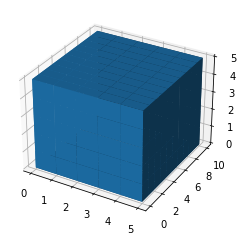

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo
def axs(z):
    axes = [5, z, 5]
    return axes
data = np.ones(axs(10))
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data)
plt.show()

El area superficial es la cuma de las caras: xy, yz y xz. De modo que, al haber dos caras de yz y xz, pero una de xy la formula seria: $xy+2yxz+2xz$

In [2]:
def f(variables):
    x,y,z=variables
    return -x*y*z

def g(variables):
    x,y,z=variables
    return x*y + 2*y*z + 2*x*z - 12

p0 = [1., 1., 1.]
constraints_ = {'type': 'eq', 'fun': g}

result = spo.minimize(f, p0, constraints=constraints_)
print(result)
print('el maximo es: ', np.round(result['fun'],3))

     fun: -4.000000340488772
     jac: array([-2.00000036, -2.00000036, -3.9999997 ])
 message: 'Optimization terminated successfully'
    nfev: 190
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([1.99999992, 1.99999998, 1.00000013])
el maximo es:  -4.0


In [3]:
def vol(variables):
    x,y,z=variables
    return x*y*z
print('el volumen maximo de la caja es: ', np.round(vol(result['x']),2))

el volumen maximo de la caja es:  4.0


In [4]:
x, y, z, l= sym.symbols('x, y, z, l')
#f = 8 * x**2 + 4 * y ** 2 - 9
#from sympy.abc import x, y, z, l
freal=x*y*z
f=-x*y*z

dx=sym.diff(f, x)
dy=sym.diff(f, y)
dz=sym.diff(f, z)

gradf=sym.Matrix([f]).jacobian(sym.Matrix(list(f.free_symbols)))

g= x*y + 2*y*z + 2*x*z - 12

dgx=sym.diff(g, x)*l
dgy=sym.diff(g, y)*l
dgz=sym.diff(g, z)*l
#solucion=sym.nsolve((g,dx-dgx,dy-dgy,dz-dgz), (x, y,z), (-1,1,-1))

#print('sol', solucion)
gradg=sym.Matrix([g]).jacobian(sym.Matrix(list(g.free_symbols)))
matriz_sol=[g,dx-dgx,dy-dgy,dz-dgz]
soluciones=sym.solve(matriz_sol, [x, y,z,l], dict=True)
print(matriz_sol)
print('la solucion utilizando multiplicadores de lagrange (l) es: ', soluciones[0])
values=list(soluciones[0].values())
print('asi el volumen maximo es: ', freal.subs({x:values[0], y:values[1],z:values[2]}))

[x*y + 2*x*z + 2*y*z - 12, -l*(y + 2*z) - y*z, -l*(x + 2*z) - x*z, -l*(2*x + 2*y) - x*y]
la solucion utilizando multiplicadores de lagrange (l) es:  {x: 2, y: 2, z: 1, l: -1/2}
asi el volumen maximo es:  4
